# EDA
This document include some investigate to the dataset

In [2]:
# import part
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [3]:
# load the data
# load the data
csv = pd.read_csv("./data/dft-road-casualty-statistics-accident-1979-2021.csv")
# csv.info()

C:\Users\29425\AppData\Local\Temp\ipykernel_10208\2617869814.py:3: DtypeWarning: Columns (0,2,15,16,35) have mixed types. Specify dtype option on import or set low_memory=False.
  csv = pd.read_csv("./data/dft-road-casualty-statistics-accident-1979-2021.csv")


In [4]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703911 entries, 0 to 8703910
Data columns (total 36 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   accident_index                               object 
 1   accident_year                                int64  
 2   accident_reference                           object 
 3   location_easting_osgr                        float64
 4   location_northing_osgr                       float64
 5   longitude                                    float64
 6   latitude                                     float64
 7   police_force                                 int64  
 8   accident_severity                            int64  
 9   number_of_vehicles                           int64  
 10  number_of_casualties                         int64  
 11  date                                         object 
 12  day_of_week                                  int64  
 13  time        

In [5]:
# filter the year from 2011 to 2021
sub_csv = csv.query("accident_year > 2010")

In [6]:
sub_csv.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

## function area

In [7]:
# plot the bar chart
def plot_bar(list, title, catag_boolen):
    fig, ax = plt.subplots()
    ax.ticklabel_format(style='plain')
    
    x = list.iloc[:, 0]
    y = list.iloc[:, 1]
    if catag_boolen:
        for index in range(len(x)):
            x[index] = str(x[index])
    bar = plt.bar(x, y)
    plt.bar_label(bar, fmt="%i", label_type="edge")
    plt.title(title)
    
    plt.show()

In [8]:
# get the value statistic
def get_accident_number_by(value_string):
    try:
        sub_csv = sub_csv[[value_string]]
    except:
        print("the value you input is not valid")
        return
    count = sub_csv.groupby([value_string]).size().reset_index(name='counts')
    return count

In [9]:
# get_bar_by_factors
def get_bar_by_factors(factor, inCata):
    try:
        return plot_bar(get_accident_number_by(factor), inCata)
    except:
        print("please check the input")
        return 

In [10]:
light_csv = sub_csv[["light_conditions"]]
weather_csv = sub_csv[["weather_conditions"]]
road_csv = sub_csv[["road_surface_conditions"]]
urban_csv = sub_csv[["urban_or_rural_area"]]

light_count = light_csv.groupby("light_conditions").size().reset_index(name='counts')
weather_count = weather_csv.groupby("weather_conditions").size().reset_index(name='counts')
road_count = road_csv.groupby("road_surface_conditions").size().reset_index(name='counts')
urban_count = urban_csv.groupby("urban_or_rural_area").size().reset_index(name='counts')


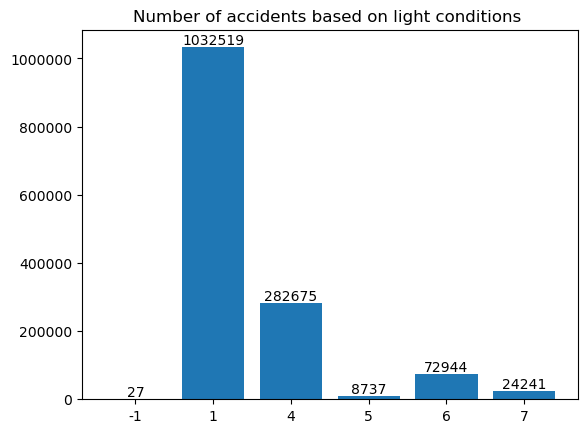

In [11]:
# light
plot_bar(light_count, "Number of accidents based on light conditions ", True)


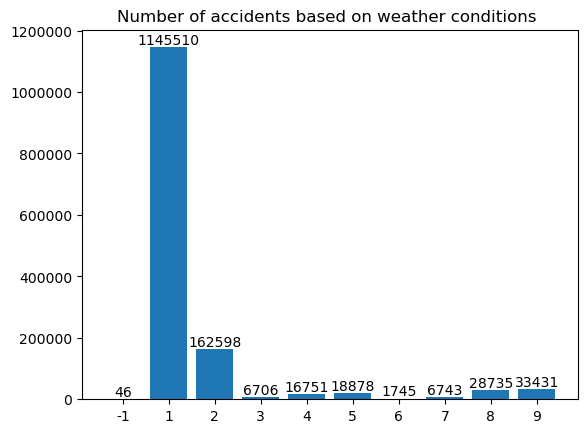

In [12]:
# weather 
plot_bar(weather_count, "Number of accidents based on weather conditions ", True)

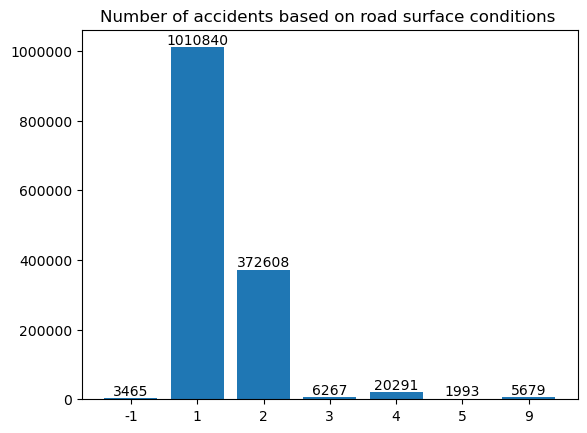

In [13]:
# road 
plot_bar(road_count, "Number of accidents based on road surface conditions ", True)

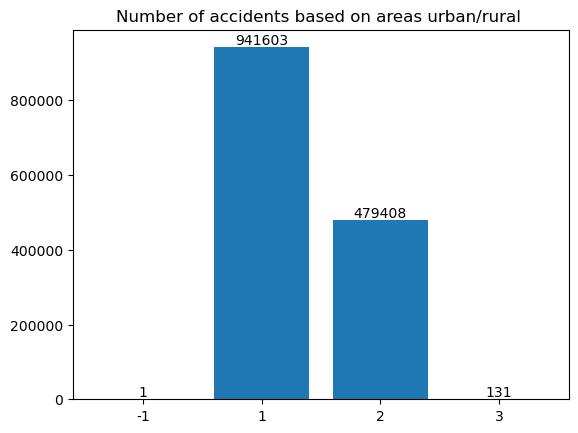

In [14]:
# urban 
plot_bar(urban_count, "Number of accidents based on areas urban/rural ", True)

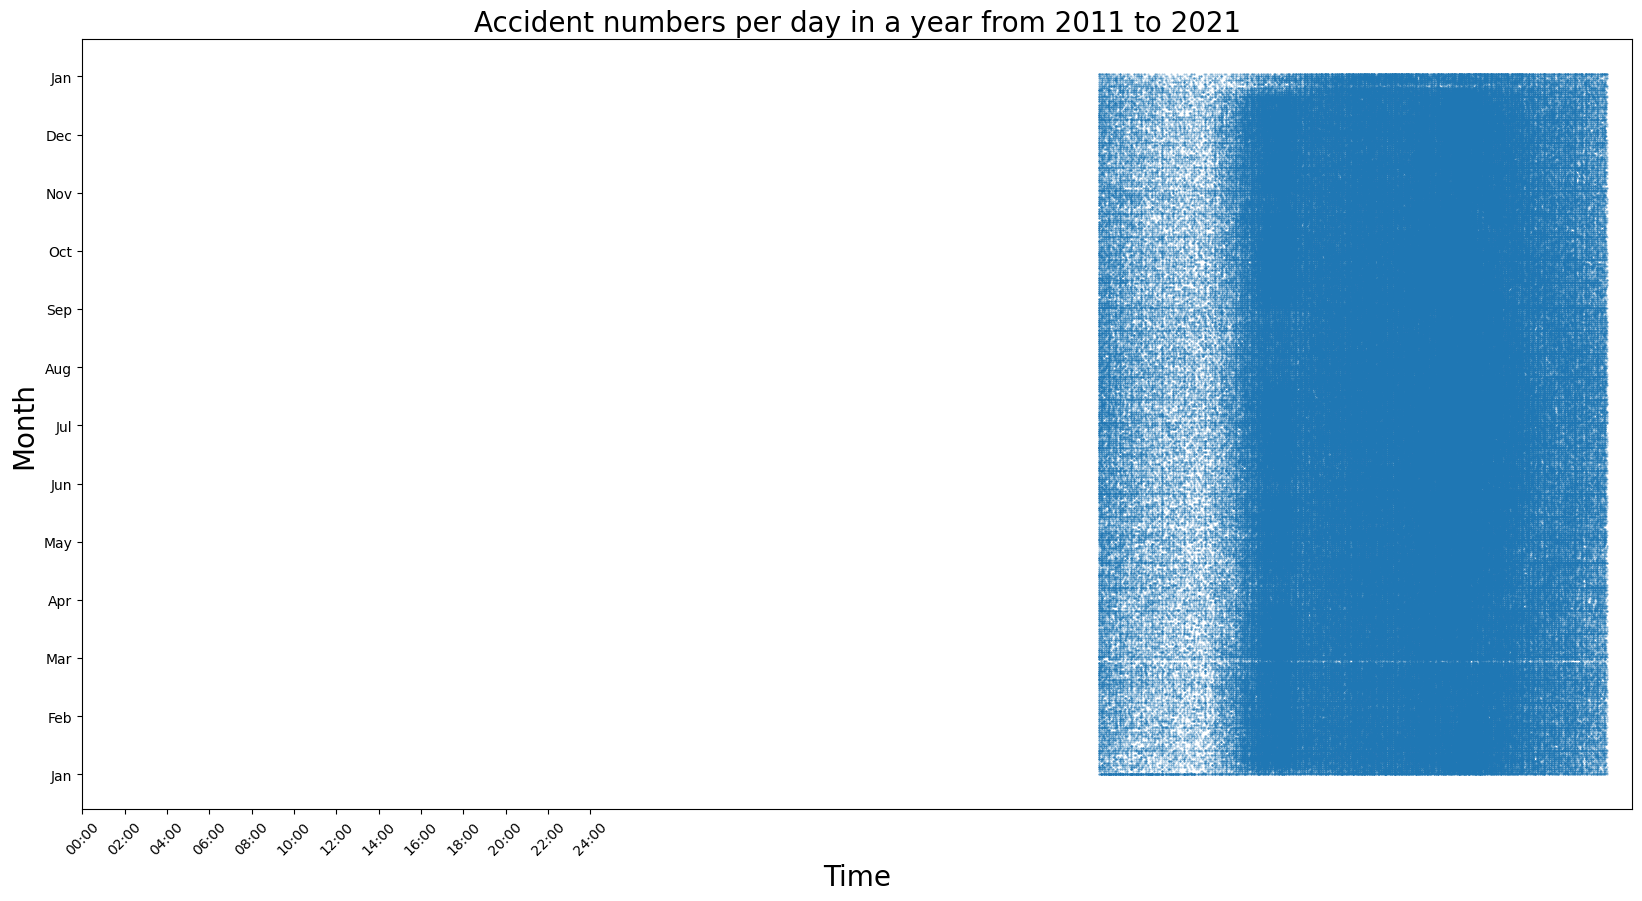

In [15]:
test_csv = csv.query("accident_year > 2010 & weather_conditions == 1 & local_authority_district != -1")[["time", "date"]].reset_index().drop(["index"],axis=1)

test_csv["time"] = pd.to_datetime(test_csv["time"])

test_csv[["date"]] = test_csv[["date"]].astype("string")
test_csv["date"] = test_csv["date"].map(lambda x: str(x)[3:-5]) + "-" + test_csv["date"].map(lambda x: str(x)[0:-8])
# test_csv

sort_csv = test_csv.sort_values(by=["date", "time"]).reset_index().drop(["index"],axis=1)
sort_csv.head()

x_ticks = np.linspace(19334, 19335, 13)
x_labels = ["00:00","02:00","04:00","06:00","08:00","10:00","12:00","14:00","16:00","18:00","20:00","22:00", "24:00"]

y_ticks = np.linspace(0, 364, 13)
y_labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec", "Jan"]

plt.figure(figsize=(20, 10), dpi=100)
plt.scatter(sort_csv["time"], sort_csv["date"].astype(str),s=1, marker=".", alpha=0.4,)
# set the style
plt.xlabel("Time", fontsize = 20)
plt.ylabel("Month", fontsize = 20)
plt.xticks(ticks=x_ticks, labels=x_labels, fontsize = 10, rotation = "45")
plt.yticks(ticks=y_ticks, labels=y_labels, fontsize = 10)
plt.title ("Accident numbers per day in a year from 2011 to 2021", fontsize = 20)

plt.show()

In [16]:
t_csv = csv.query("accident_year > 2010 & local_authority_ons_district == 'E09000001'").reset_index().drop(["index"],axis=1)


t_csv["date"] = pd.to_datetime(t_csv["date"])
date_count = t_csv.groupby("date").size().reset_index(name='counts')

date_count.head(200)

d:\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
d:\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
d:\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
d:\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent pars

date  counts
0   2011-01-02       1
1   2011-01-07       2
2   2011-01-08       2
3   2011-01-09       1
4   2011-01-11       1
..         ...     ...
195 2011-11-17       1
196 2011-11-18       4
197 2011-11-19       1
198 2011-11-21       1
199 2011-11-22       1

[200 rows x 2 columns]

In [17]:
x = date_count.iloc[:, 0]
y = date_count.iloc[:, 1]

x = x.astype("string")

plt.figure(figsize=(50, 10), dpi=500)
bar = plt.plot(x, y)
plt.xticks(fontsize = 1,rotation = "90")
plt.title("title")
plt.show()

In [18]:
t_csv_1 = t_csv.query("light_conditions != -1 & weather_conditions != -1 & weather_conditions != 8 & weather_conditions != 9 & road_surface_conditions != -1 & road_surface_conditions != 9 & urban_or_rural_area != -1").reset_index().drop(["index"],axis=1)
t_csv_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3164 entries, 0 to 3163
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   accident_index                               3164 non-null   object        
 1   accident_year                                3164 non-null   int64         
 2   accident_reference                           3164 non-null   object        
 3   location_easting_osgr                        3163 non-null   float64       
 4   location_northing_osgr                       3163 non-null   float64       
 5   longitude                                    3163 non-null   float64       
 6   latitude                                     3163 non-null   float64       
 7   police_force                                 3164 non-null   int64         
 8   accident_severity                            3164 non-null   int64         
 9

In [19]:
t_csv_1.loc[t_csv_1["light_conditions"].isin([1,4]), "light_conditions"] = 1
t_csv_1.loc[t_csv_1["light_conditions"].isin([5,6,7]), "light_conditions"] = 0

t_csv_1.loc[t_csv_1["weather_conditions"].isin([1,4]), "weather_conditions"] = 1
t_csv_1.loc[t_csv_1["weather_conditions"].isin([2,3,5,6,7]), "weather_conditions"] = 0

t_csv_1.loc[t_csv_1["road_surface_conditions"].isin([1]), "road_surface_conditions"] = 1
t_csv_1.loc[t_csv_1["road_surface_conditions"].isin([2,3,4,5,6,7]), "road_surface_conditions"] = 0

t_csv_1.loc[t_csv_1["urban_or_rural_area"].isin([1]), "urban_or_rural_area"] = 1
t_csv_1.loc[t_csv_1["urban_or_rural_area"].isin([2,3]), "urban_or_rural_area"] = 0

t_csv_1.head()

accident_index  accident_year accident_reference  location_easting_osgr  \
0  201101CP00001           2011          01CP00001               532740.0   
1  201101CP00002           2011          01CP00002               532100.0   
2  201101CP00003           2011          01CP00003               533560.0   
3  201101CP00004           2011          01CP00004               533280.0   
4  201101CP00005           2011          01CP00005               532660.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                181040.0  -0.088487  51.512646            48   
1                181890.0  -0.097387  51.520435            48   
2                181150.0  -0.076636  51.513442            48   
3                181600.0  -0.080499  51.517552            48   
4                181330.0  -0.089531  51.515271            48   

   accident_severity  number_of_vehicles  ...  \
0                  2                   2  ...   
1                  3                   1  ...   
2                  3                   1  ...   
3                  3                   2  ...   
4                  3                   1  ...   

   pedestrian_crossing_physical_facilities light_conditions  \
0                                        5                1   
1                                        0                1   
2                                        4                1   
3                                        5                1   
4                                        0                1   

   weather_conditions road_surface_conditions  special_conditions_at_site  \
0                   0                       0                           0   
1                   0                       0                           0   
2                   1                       1                           0   
3                   1                       1                           0   
4                   1                       1                           0   

  carriageway_hazards urban_or_rural_area  \
0                   0                   1   
1                   0                   1   
2                   0                   1   
3                   0                   1   
4                   0                   1   

   did_police_officer_attend_scene_of_accident  trunk_road_flag  \
0                                            1                2   
1                                            1                2   
2                                            1                2   
3                                            1                2   
4                                            1                2   

   lsoa_of_accident_location  
0                  E01000004  
1                  E01000001  
2                  E01000004  
3                  E01000004  
4                  E01000004  

[5 rows x 36 columns]

In [20]:
factor_list_withdate = ["light_conditions",  # Daylight-1    Darkness-4567
               "weather_conditions",  # Good-1,4    Bad-23567
               "road_surface_conditions",  # Good-1 Bad-234567
               "urban_or_rural_area",
               "date"] # urban-1     rural-2

factor_list = ["light_conditions",  # Daylight-1    Darkness-4567
               "weather_conditions",  # Good-1,4    Bad-23567
               "road_surface_conditions",  # Good-1 Bad-234567
               "urban_or_rural_area"] # urban-1     rural-2

t_csv_2 = t_csv_1.groupby(factor_list_withdate).size().reset_index(name='accident_counts')

t_csv_2.head()

light_conditions  weather_conditions  road_surface_conditions  \
0                 0                   1                        1   
1                 0                   1                        1   
2                 0                   1                        1   
3                 0                   1                        1   
4                 0                   1                        1   

   urban_or_rural_area       date  accident_counts  
0                    1 2012-01-14                1  
1                    1 2012-03-02                1  
2                    1 2012-03-21                1  
3                    1 2012-08-11                1  
4                    1 2012-11-27                1

In [21]:
# reform the df to do dummy
t_csv_2[factor_list] = t_csv_2[factor_list].astype(object)

# get dummy
t_csv_3 = pd.get_dummies(t_csv_2)


t_csv_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       2229 non-null   datetime64[ns]
 1   accident_counts            2229 non-null   int64         
 2   light_conditions_0         2229 non-null   uint8         
 3   light_conditions_1         2229 non-null   uint8         
 4   weather_conditions_0       2229 non-null   uint8         
 5   weather_conditions_1       2229 non-null   uint8         
 6   road_surface_conditions_0  2229 non-null   uint8         
 7   road_surface_conditions_1  2229 non-null   uint8         
 8   urban_or_rural_area_0      2229 non-null   uint8         
 9   urban_or_rural_area_1      2229 non-null   uint8         
dtypes: datetime64[ns](1), int64(1), uint8(8)
memory usage: 52.4 KB


d:\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [22]:
# Get the Correlation Matrix by df
def get_cm_by_df(df):
    plt.rcParams["axes.grid"] = False
    f = plt.figure(figsize=(19, 15))
    plt.matshow(df.corr(), fignum=f.number)
    plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
    plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title('Correlation Matrix', fontsize=16)

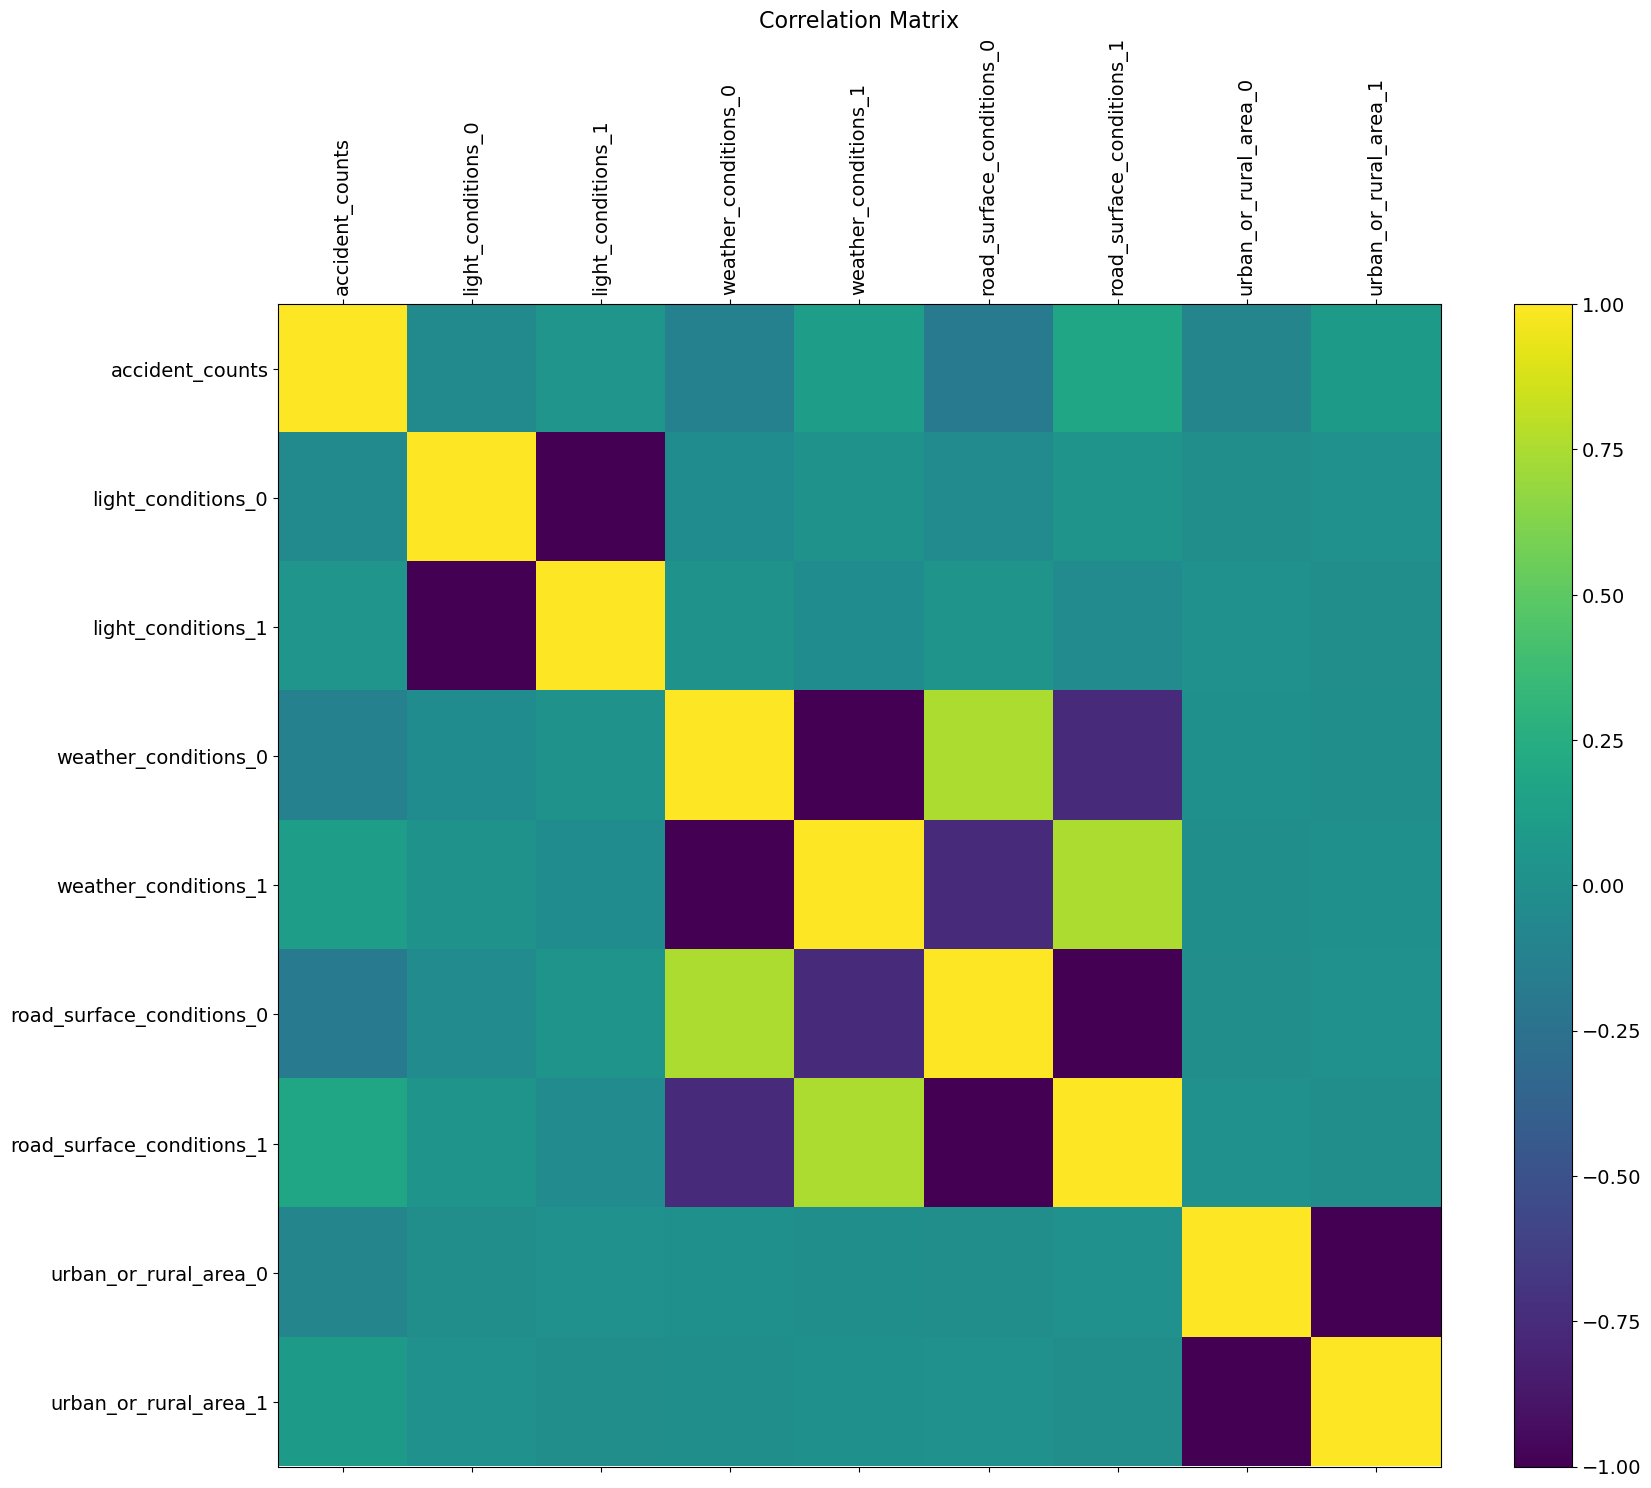

In [23]:
result = t_csv_3.drop('date', axis=1)
get_cm_by_df(result)

In [24]:
# VIF calculating  function: drop_column_using_vif_(df, thresh=5)
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [25]:
df_predictors_selected_VIF = drop_column_using_vif_(result.drop(['accident_counts'], axis=1))
df_predictors_selected_VIF

Dropping: light_conditions_0
Dropping: weather_conditions_0
Dropping: road_surface_conditions_0
Dropping: urban_or_rural_area_0


d:\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
d:\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
d:\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
d:\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
d:\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
d:\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_sc

light_conditions_1  weather_conditions_1  road_surface_conditions_1  \
0                      0                     1                          1   
1                      0                     1                          1   
2                      0                     1                          1   
3                      0                     1                          1   
4                      0                     1                          1   
...                  ...                   ...                        ...   
2224                   1                     1                          1   
2225                   1                     1                          1   
2226                   1                     1                          1   
2227                   1                     1                          1   
2228                   1                     1                          1   

      urban_or_rural_area_1  
0                         1  
1                         1  
2                         1  
3                         1  
4                         1  
...                     ...  
2224                      1  
2225                      1  
2226                      1  
2227                      1  
2228                      1  

[2229 rows x 4 columns]

In [26]:
# build the model via VIF
model_accident = sm.OLS(endog=result[['accident_counts']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()

model_accident.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        accident_counts   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     25.47
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           1.17e-20
Time:                        00:22:32   Log-Likelihood:                -2465.4
No. Observations:                2229   AIC:                             4941.
Df Residuals:                    2224   BIC:                             4969.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2076      0.232      0.896      0.370      -0.247       0.662
light_conditions_1            0.4921      0.204      2.415      0.016       0.092       0.892
weather_conditions_1         -0.0834      0.080     -1.043      0.297      -0.240       0.073
road_surface_conditions_1     0.4275      0.065      6.555      0.000       0.300       0.555
urban_or_rural_area_1         0.4484      0.098      4.562      0.000       0.256       0.641
==============================================================================
Omnibus:                      856.219   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3023.167
Skew:                           1.929   Prob(JB):                         0.00
Kurtosis:                       7.202   Cond. No.                         41.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""